In [7]:
# ===============================
# 📦 Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
# ===============================
# 📂 Load Dataset
# ===============================
df = pd.read_csv('amazon.csv')   # Replace with your file name
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

✅ Dataset Loaded Successfully!

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1   

In [9]:
# ===============================
# 🧹 Data Cleaning
# ===============================
# Remove missing or invalid data
df = df.dropna(subset=['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'])


In [10]:
# Clean and convert price and discount columns
for col in ['discounted_price', 'actual_price']:
    df[col] = df[col].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')


In [11]:

# Ensure numeric data types for other columns
for col in ['rating', 'rating_count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()


In [12]:

# ===============================
# 🧮 Feature Engineering
# ===============================
# Let's assume "sales potential" depends on price, discount & ratings
# We'll use actual_price, discount_percentage, rating, and rating_count as features
X = df[['actual_price', 'discount_percentage', 'rating', 'rating_count']]
y = df['discounted_price']   # Predicting discounted price (proxy for sales trend)

In [13]:


# ===============================
# 🔀 Split Data
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:

# ===============================
# 🧠 Train Model
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [15]:

# ===============================
# 🔮 Predict
# ===============================
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Model Performance:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")




📊 Model Performance:
MAE  = 537.29
RMSE = 1346.85


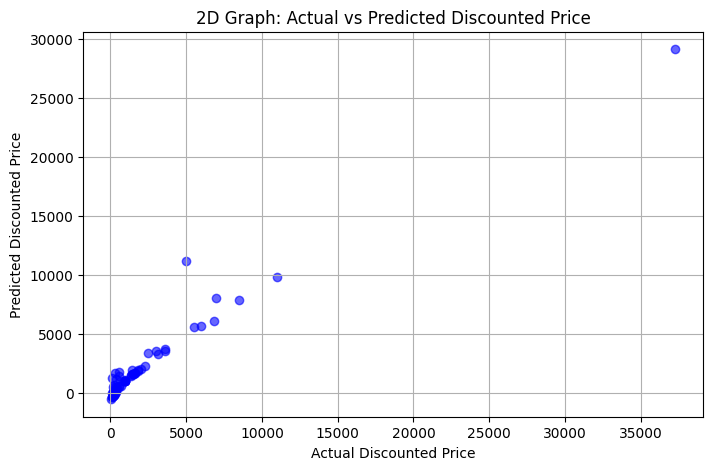

In [16]:

# ===============================
# 📈 2D Graph – Actual vs Predicted Discounted Price
# ===============================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Discounted Price')
plt.ylabel('Predicted Discounted Price')
plt.title('2D Graph: Actual vs Predicted Discounted Price')
plt.grid(True)
plt.show()


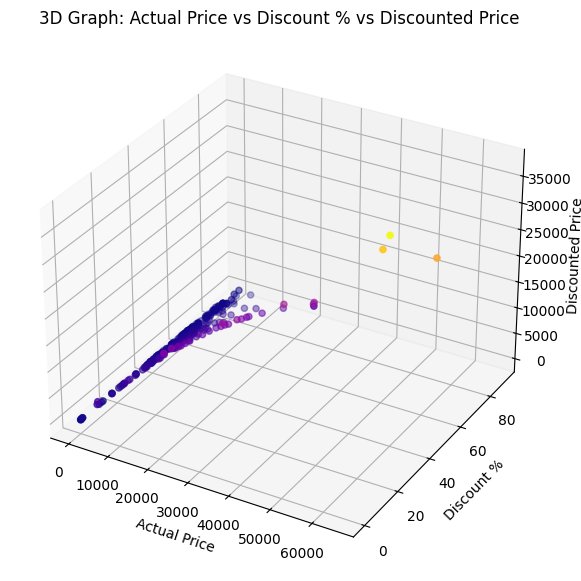

In [17]:

# ===============================
# 📊 3D Graph – Price vs Discount vs Predicted Sales
# ===============================
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['actual_price'], df['discount_percentage'], df['discounted_price'],
           c=df['discounted_price'], cmap='plasma')

ax.set_title('3D Graph: Actual Price vs Discount % vs Discounted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Discount %')
ax.set_zlabel('Discounted Price')
plt.show()


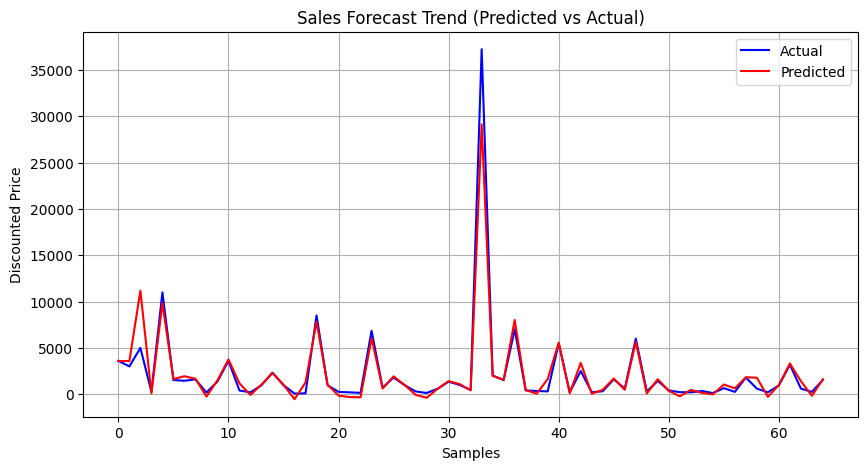

In [18]:

# ===============================
# 📈 Predicted Trend Analysis
# ===============================
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test.values, label='Actual', color='blue')
plt.plot(range(len(y_test)), y_pred, label='Predicted', color='red')
plt.title('Sales Forecast Trend (Predicted vs Actual)')
plt.xlabel('Samples')
plt.ylabel('Discounted Price')
plt.legend()
plt.grid(True)
plt.show()